# Assignment 2

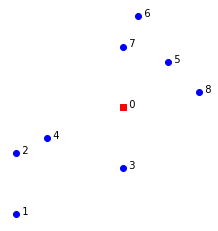

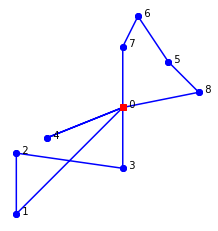

In [53]:
from numpy import *
import matplotlib
import matplotlib.pyplot as plt



class data: 
    cust = 8 #Number of customers
    m = 3 #Maximum number of vehicles
    Q = 10 #Maximum vehicle capacity

    demand = array([4,  3,  3,   3,   3,  4,  3,  3  ]) #demand per customer
    twStart = array([0,  6,  8,  4,   6,   5,  6,  5,  4,  0]) #earlierst delivery time
    twEnd   = array([24, 6,  16, 20,  6,  19, 18, 19, 6, 24]) #latest delivery time


    # Travel cost matrix
    cost = array([
        [0,  7,  5,  3,  3,  4,  5,  4,  3,  0],
        [7,  0,  3,  5,  4, 11, 12, 10, 10,  7],
        [5,  3,  0,  5,  2,  9,  9,  8,  9,  5],
        [3,  5,  5,  0,  4,  6,  8,  7,  5,  3],
        [3,  4,  2,  4,  0,  6,  7,  6,  6,  3],
        [4, 11,  9,  6,  6,  0,  2,  2,  2,  4],
        [5, 12,  9,  8,  7,  2,  0,  1,  4,  5],
        [4, 10,  8,  7,  6,  2,  1,  0,  4,  4],
        [3, 10,  9,  5,  6,  2,  4,  4,  0,  3],
        [0,  7,  5,  3,  3,  4,  5,  4,  3,  0]
        ])
    
    #Travel time matrix
    timeCost = array([
        [0,  6,  6,  4,  4,  5,  6,  5,  4,  0],
        [6,  0,  4,  6,  5, 12, 13, 11, 11,  6],
        [6,  4,  0,  6,  3, 10, 10,  9, 10,  6],
        [4,  6,  6,  0,  5,  7,  9,  8,  6,  4],
        [4,  5,  3,  5,  0,  7,  8,  7,  7,  4],
        [5, 12, 10,  7,  7,  0,  3,  3,  3,  5],
        [6, 13, 10,  9,  8,  3,  0,  2,  5,  6],
        [5, 11,  9,  8,  7,  3,  2,  0,  5,  5],
        [4, 11, 10,  6,  7,  3,  5,  5,  0,  4],
        [0,  6,  6,  4,  4,  5,  6,  5,  4,  0]
        ])
  
    #The initial routes for Task 4
    #Each row describe the customers visited in a route. If the n'th index in a row is '1.0', then the route visits customer n.
    routes = array([
        [0, 0, 0, 1, 0, 1, 1, 0],
        [0, 0, 0, 0, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 1, 0, 0, 0, 0, 1],
        [0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 1, 1],
        [0, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1]
    ])

    #The distance cost of the initial routes.
    costRoutes = array([15.0, 12.0, 22.0, 18.0, 15.0, 22.0, 18.0, 10.0, 15.0, 11.0, 13.0, 12.0])

    #For Task 5. Input the routes you found in Task 2
    routes = array([[]])
    costRoutes = array([])


    nodes = [(3.5,3.5),(0,0),(0,2),(3.5,1.5),(1,2.5),(5,5),(4,6.5),(3.5,5.5),(6,4)]
    labels = list(range(9))

    @staticmethod
    def plot_points(outputfile_name=None):
        "Plot instance points."
        style='bo'
        plt.plot([node[0] for node in data.nodes], [node[1] for node in data.nodes], style)
        plt.plot([data.nodes[0][0]], [data.nodes[0][1]], "rs")
        for (p, node) in enumerate(data.nodes):
            plt.text(node[0], node[1], '  '+str(data.labels[p]))
        plt.axis('scaled'); plt.axis('off')
        if outputfile_name is None:
            plt.show()
        else:
            plt.savefig(outputfile_name)

    @staticmethod
    def plot_routes(points, style='bo-'):
        "Plot lines to connect a series of points."
        for route in points:
            plt.plot(list(map(lambda p: data.nodes[p][0], route)), list(map(lambda p: data.nodes[p][1], route)), style)
        data.plot_points()


if __name__ == "__main__":
    data.plot_points()
    data.plot_routes([[0,1,2,3,0],[0,4,0],[0,7,6,5,8,0]])

In [54]:
def makeQ(routes, timeCost, es):
    def q(i, r, debug=False):
        rRoutes = routes[r]
        accum = 0
        routesBefore = rRoutes[:i + 1] # n means the first n + 1 elements since it is 0 indexed
        # Filter for defined transitions, and change to account for initial position (0)
        filtered = [0] + list(map(lambda x: x[0] + 1, filter(lambda p: p[1] == 1, enumerate(routesBefore))))
        for idx, j in enumerate(filtered):
            # This earliest time
            e_j = 0
            travelCost = 0
            # In case of start position, we dont have any previous
            if j != 0:
                # Indexed without start (0)
                e_j = es[j - 1]
                # Route from j - 1 to j, indexed with start (0)
                prevCust = filtered[idx - 1]
                travelCost = timeCost[prevCust, j]
            # Account for waiting time if we are too early
            # The time when we are here (i) is accum + time for this travel step
            # If the difference from e_i, eg e_i - (travelCost + accum)
            # is positive, then we must wait for so long
            # such that the customer can be served.
            additionalCost = max(0, e_j - (travelCost + accum))
            accum = additionalCost + travelCost + accum
        return accum
    return q

def makeCs(routes, costs):
    c = {}
    
    for r, route in enumerate(routes):
        accum = 0
        enumFiltered = [0] + list(map(lambda x: x[0] + 1, filter(lambda x: x[1] == 1, enumerate(route)))) + [0]
        
        for idx, cust in enumerate(enumFiltered):
            if idx != 0:
                prev = enumFiltered[idx - 1]
                accum = accum + costs[prev, cust]
                
        c[r] = accum
        
    return c

In [69]:
import pyomo.environ as po
import time
from datetime import datetime

def model(omega, data, domain=po.Binary, tee=False, lambdas=None):
    c = makeCs(omega, data.cost)
    
    R = list(range(len(omega)))
    
    m = po.ConcreteModel("lp_relaxed")
    
    def a(i, r):
        return omega[r][i]
    
    N = list(range(data.cust))
    
    theta_domain = R
    m.theta = po.Var(theta_domain, domain=domain)
    
    additional = 0
    
    if lambdas:
        additional = lambdas * (sum(m.theta[r] for r in R) - data.m)
        
    m.value = po.Objective(expr=sum(int(c[r]) * m.theta[r] for r in R) - additional, sense=po.minimize)
    
    m.activation_constraint = po.ConstraintList()
    for i in N:
        m.activation_constraint.add(1 == sum(
            a(i, r) * m.theta[r]
        for r in R))
        
    m.activated_routes_delivery_cars = po.ConstraintList()
    m.activated_routes_delivery_cars.add(data.m >= sum(m.theta[r] for r in R))
    
    print("Solving...")
    
    now = time.time()
        
    res = po.SolverFactory("gurobi").solve(m, tee=(tee))
    
    later = time.time()
    difference = int(later - now)
    
    print("Solved in", difference, "seconds")
    
    return m, res, c, q

In [70]:
from itertools import chain, combinations
import numpy as np
def all_subsets(ss):
    return chain(*map(lambda x: combinations(ss, x), range(0, len(ss)+1)))

# Generate all combinations/subsets with sum demand <= Q
filteredRoutes = filter(lambda s: data.Q >= sum(list(map(lambda e: int(data.demand[e]), s))) , all_subsets(range(data.cust)))

# Defined = 1, Undefined = 0
omegaR = []

for r in filteredRoutes:
    asSet = set(r)
    l = []
    for i, c in enumerate(range(data.cust)):
        if c in asSet:
            l.append(1)
        else:
            l.append(0)
    omegaR.append(l)
    
# We can preemptively apply the q filter
omega = []

q = makeQ(omegaR, data.timeCost, data.twStart)

def filterCondition(r, route):
    definedIndicies = list(map(lambda x: x[0], filter(lambda x: x[1] == 1, enumerate(route))))
    for i in definedIndicies:
        timeToGetHere = q(i, r)
        if timeToGetHere > data.twEnd[i]:
            return False
    return True
    
# For each defined element, check if the q constraint holds.
omega = list(map(lambda x: x[1], filter(lambda r: filterCondition(r[0], r[1]), enumerate(omegaR))))

m, res, c, q = model(list(omega), data, domain=po.NonNegativeReals)
m2, res2, c2, q2 = model(list(omega), data, domain=po.Binary)

Solving...


/home/valde/.pyenv/versions/3.7.7/envs/opti/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/home/valde/.pyenv/versions/3.7.7/envs/opti/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/home/valde/.pyenv/versions/3.7.7/envs/opti/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


Solved in 0 seconds
Solving...
Solved in 0 seconds


In [152]:
# Stole this code from exercise
def heuristic_sol(x, omega, cL):
    R = list(range(len(omega)))
    x_h=np.copy(x)
    # Find the un-covered customers
    uncovered = set(range(data.cust))
    for r, a in enumerate(x_h):
        if a == 1:
            for cidx, c in enumerate(omega[r]):
                if c == 1:
                    uncovered.discard(cidx)
        
    for c in uncovered:
        for ri, r in enumerate(omega):
            if r[c] == 1:
                x_h[ri]=1
                break
                
    z_UB = sum(int(cL[r]) * x_h[r] for r in R)
    return z_UB

def solve_lagrangian_dual(omega, data, mu=2, iterations=10):
    zs_LR=[]
    zs_LB=[]
    zs_UB=[]
    z_best_LB=-1000
    lambdas_ = []
    lambdas = np.array([0])
    for t in range(iterations):
        mL, resL, cL, qL = model(list(omega), data, domain=po.Binary, lambdas=lambdas[0])
        z_LR = mL.value()
        x = [v() for v in mL.component_data_objects(po.Var, active=True)]
        if z_best_LB<z_LR:
            z_best_LB=z_LR
        z_UB = heuristic_sol(x, omega, cL)
        gamma = np.array([data.m - np.transpose(np.array(omega)) @ x])[0]
        theta = mu * ( z_UB - z_LR )/(sum(gamma**2))
        for i in range(len(lambdas)):
            if (gamma[i]>0.1):                
                lambdas[i] = max(lambdas[i] + theta * gamma[i], 0)
        zs_UB.append(z_UB); zs_LR.append(z_LR); zs_LB.append(z_best_LB); lambdas_.append(lambdas)
    return lambdas

In [161]:
lambdas = solve_lagrangian_dual(list(omega), data)
print(lambdas)
mL, resL, cL, qL = model(list(omega), data, domain=po.Binary, lambdas=lambdas)
resL.write(num=1)
o = []
for n in range(len(omega)):
    if mL.theta[n] != 0:
        o.append(omega[n])
print(o)

Solving...


/home/valde/.pyenv/versions/3.7.7/envs/opti/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/home/valde/.pyenv/versions/3.7.7/envs/opti/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/home/valde/.pyenv/versions/3.7.7/envs/opti/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


Solved in 0 seconds
Solving...


/home/valde/.pyenv/versions/3.7.7/envs/opti/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


Solved in 0 seconds
Solving...
Solved in 0 seconds
Solving...
Solved in 0 seconds
Solving...
Solved in 0 seconds
Solving...
Solved in 0 seconds
Solving...
Solved in 0 seconds
Solving...
Solved in 0 seconds
Solving...
Solved in 0 seconds
Solving...
Solved in 0 seconds
[0]
Solving...
Solved in 0 seconds
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x50
  Lower bound: 41.0
  Upper bound: 41.0
  Number of objectives: 1
  Number of constraints: 10
  Number of variables: 50
  Number of binary variables: 49
  Number of integer variables: 49
  Number of continuous variables: 1
  Number of nonzeros: 155
  Sense: minimize
# ----------------------------------------------------------
#   Solver Informa

In [160]:
res.write(num=1)
res2.write(num=1)
o = []
for n in range(len(omega)):
    if m.theta[n] != 0:
        o.append(omega[n])
print(o)


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x50
  Lower bound: 41.0
  Upper bound: 41.0
  Number of objectives: 1
  Number of constraints: 10
  Number of variables: 50
  Number of binary variables: 0
  Number of integer variables: 0
  Number of continuous variables: 50
  Number of nonzeros: 155
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: Model was solved to optimality (subjec